In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
import csv
import cv2
import scipy


Using TensorFlow backend.
/anaconda/envs/unet/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
num_classes = 5
epochs = 20
# BASE_PATH = '/home/ec2-user/cell_classifier/'
BASE_PATH = '../'
batch_size = 32

In [3]:
def get_filename_for_index(index):
    PREFIX = 'images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'

In [42]:
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1 and label is not 'BASOPHIL':
        filename = get_filename_for_index(row[1])
        img_file = cv2.imread(BASE_PATH + filename)
        if img_file is not None:
            img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)


X = np.asarray(X)
y = np.asarray(y)

In [43]:
eosinophil_samples = X[np.where(y == 'EOSINOPHIL')]
lymphocyte_samples = X[np.where(y == 'LYMPHOCYTE')]
monocyte_samples = X[np.where(y == 'MONOCYTE')]
neutrophil_samples = X[np.where(y == 'NEUTROPHIL')]


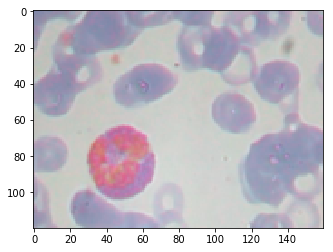

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

len(eosinophil_samples)
plt.imshow(eosinophil_samples[5])

In [61]:
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.1)

In [71]:
eosinophil_generator = datagen.flow(
        eosinophil_samples,
        y[np.where(y == 'EOSINOPHIL')],
        save_to_dir='../images/EOSINOPHIL',
        batch_size=1)

lymphocyte_generator = datagen.flow(
        lymphocyte_samples,
        y[np.where(y == 'LYMPHOCYTE')],
        save_to_dir='../images/LYMPHOCYTE',
        batch_size=1)

monocyte_generator = datagen.flow(
        monocyte_samples,
        y[np.where(y == 'MONOCYTE')],
        save_to_dir='../images/MONOCYTE',
        batch_size=1)

neutrophil_generator = datagen.flow(
        neutrophil_samples,
        y[np.where(y == 'NEUTROPHIL')],
        save_to_dir='../images/NEUTROPHIL',
        batch_size=1)

In [72]:
for i in range(500):
    next(eosinophil_generator)
    next(lymphocyte_generator)
    next(monocyte_generator)
    next(neutrophil_generator)